<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-a-Dataset" data-toc-modified-id="Generate-a-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate a Dataset</a></span></li><li><span><a href="#Compare-by-Means" data-toc-modified-id="Compare-by-Means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare by Means</a></span></li><li><span><a href="#Compare-by-Distplots" data-toc-modified-id="Compare-by-Distplots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compare by Distplots</a></span></li><li><span><a href="#Compare-by-Boxplots" data-toc-modified-id="Compare-by-Boxplots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compare by Boxplots</a></span></li><li><span><a href="#Compare-by-T-Tests" data-toc-modified-id="Compare-by-T-Tests-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compare by T-Tests</a></span></li><li><span><a href="#Compare-by-Confidence-Intervals" data-toc-modified-id="Compare-by-Confidence-Intervals-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare by Confidence Intervals</a></span></li></ul></div>

In [1]:
# we won't use them all
# it's just Mosky's “lab header”
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
# comment it, or
# download the font from https://www.google.com/get/noto/#sans-hant
# if still fail after install the font, remove the cache dir https://matplotlib.org/faq/troubleshooting_faq.html#matplotlib-configuration-and-cache-directory-locations
# mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
np.random.seed(20180701+1)

# Generate a Dataset

In [3]:
# pd.Series(...) is just like a column in excel
# norm.rvs(loc=mu, scale=sigma, size=n) === sample n from X ~ N(mu, sigma)
group_ctl = pd.Series(name='height', data=sp.stats.norm.rvs(loc=170, scale=5, size=100))
group_exp_1 = pd.Series(name='height', data=sp.stats.norm.rvs(loc=170, scale=5, size=100))
group_exp_2 = pd.Series(name='height', data=sp.stats.norm.rvs(loc=170+2, scale=5, size=100))

In [4]:
group_ctl.head()

0    162.526543
1    176.272414
2    169.757880
3    168.861235
4    172.672516
Name: height, dtype: float64

In [5]:
group_exp_1.head()

0    180.718043
1    163.489327
2    169.421511
3    172.989371
4    166.585955
Name: height, dtype: float64

In [6]:
group_exp_2.head()

0    175.117578
1    165.693030
2    171.758333
3    170.628202
4    168.315145
Name: height, dtype: float64

# Compare by Means

In [7]:
group_ctl.describe()

count    100.000000
mean     169.612832
std        4.529428
min      158.304719
25%      167.157604
50%      169.774253
75%      172.423286
max      179.218983
Name: height, dtype: float64

In [8]:
group_exp_1.describe()

count    100.000000
mean     169.878311
std        4.629288
min      157.349978
25%      167.093234
50%      169.371563
75%      172.644362
max      181.994421
Name: height, dtype: float64

In [9]:
group_exp_2.describe()

count    100.000000
mean     171.838924
std        5.291648
min      159.956181
25%      168.275924
50%      171.847332
75%      175.261413
max      185.506297
Name: height, dtype: float64

In [10]:
group_exp_1.mean() > group_ctl.mean()

True

In [11]:
group_exp_2.mean() > group_ctl.mean()

True

# Compare by Distplots

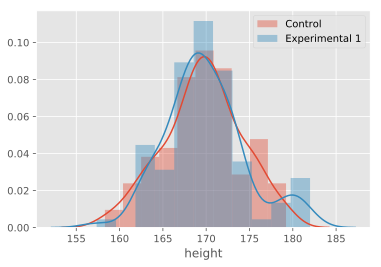

In [12]:
sns.distplot(group_ctl)
sns.distplot(group_exp_1)
plt.legend(['Control', 'Experimental 1'])

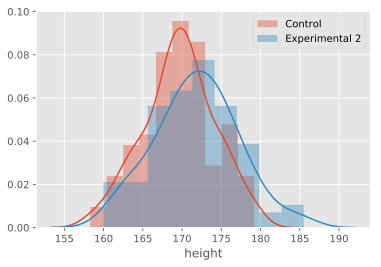

In [13]:
sns.distplot(group_ctl)
sns.distplot(group_exp_2)
plt.legend(['Control', 'Experimental 2'])

# Compare by Boxplots

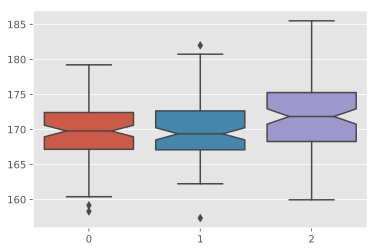

In [14]:
sns.boxplot(data=[group_ctl, group_exp_1, group_exp_2], notch=True)

* Box: Q1–Q3 = 25th – 75th percentile = 50% of data.
* Line: the median = the 50th percentile.
* Whiskers:
    * Q1 - 1.5 IQR, where IQR = Q3 - Q1.
    * Q3 + 1.5 IQR.
    * = 99.3% of data if from a normal distribution.
* Points: the outliners out of 99.3% of data if from a normal distribution.
* Notch: 95% confidence interval (CI) of normal distribution.
    * Here the CI comes from Gaussian-based asymptotic approximation with no bootstrap.
    * The CI also can be $ median \pm 1.57\dfrac{IQR}{\sqrt{n}} $.
    * If the notches don't overlap, significant.

# Compare by T-Tests

In [15]:
# alpha
# === significance level
# === predefined false positive rate
# === predefined P(predicted + | actual -)
# like predefined P(+ | non-user) in a drug test
# like predefined P(we say not fair | fair) in a fair coin test
alpha = 0.05

In [16]:
ttest_result = sp.stats.ttest_ind(group_ctl, group_exp_1)
print(ttest_result)
print(ttest_result.pvalue < alpha)

Ttest_indResult(statistic=-0.4099072017185312, pvalue=0.6823171712742595)
False


In [17]:
ttest_result = sp.stats.ttest_ind(group_ctl, group_exp_2)
print(ttest_result)
print(ttest_result.pvalue < alpha)

Ttest_indResult(statistic=-3.1959130447343154, pvalue=0.001622421465212757)
True


# Compare by Confidence Intervals

In [18]:
for s in [group_ctl, group_exp_1]:
    # the `alpha=` is not our alpha but our 1-alpha, which is just confidence level
    print(sp.stats.t.interval(loc=np.mean(s), scale=sp.stats.sem(s), df=len(s)-1, alpha=0.95))
    # check if overlap

(168.71409504454311, 170.5115685662343)
(168.95976008150933, 170.79686249019073)


In [19]:
for s in [group_ctl, group_exp_2]:
    print(sp.stats.t.interval(loc=np.mean(s), scale=sp.stats.sem(s), df=len(s)-1, alpha=0.95))

(168.71409504454311, 170.5115685662343)
(170.7889458454778, 172.8889015290766)


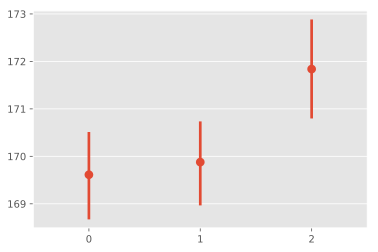

In [20]:
sns.pointplot(data=[group_ctl, group_exp_1, group_exp_2], join=False)